<a href="https://colab.research.google.com/github/devadharshini97/ML-projects/blob/main/Adv_ML_Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import requests, gzip, os, hashlib

In [62]:
#fetch data from the url directly. I tried copy pasting the zip files from the website but, it got uncompressed everytime 
#I did it manually, so I had to program (got this piece of program from online for storing data in local path) to directly 
#get the data from the url and stored it in the path.

path='/content/sample_data/mnist'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28,28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [63]:
#checking the shape of the dataset
print(X.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# New Section

In [64]:
#reshaping the images to vectorized form
X_train = np.reshape(X, (-1,784))
X_test = np.reshape(X_test, (-1, 784))

In [65]:
#normalizing the image pixel size to be between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [66]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [68]:
#Converting the Y labels for test and train to one-hot vector form 
#which means all the elements will be 0 except for one element that uniquely identifies the index of the label 
from tensorflow.keras.utils import to_categorical

#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)

In [69]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


In [70]:
#defining 2 hidden layers with an input and output layer.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

Mod = Sequential()
Mod.add(InputLayer(input_shape=(784, ))) 
Mod.add(Dense(256, activation='relu')) 
Mod.add(Dense(256, activation='relu')) 
Mod.add(Dense(10, activation='softmax')) 

Mod.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


The input layer has no activation function. And for the hidden layers, non-linear activation functions are used as the mnist dataset classification is non-linear that establishes non-linear relation between data.
So, we use the ReLu function for this purpose. For the output layer the Softmax activation function is used since there are 10 nodes in the output layer and each correcponds to 10 classes/ labels.

In [71]:
#optimization
Mod.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
history = Mod.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2590 - accuracy: 0.9255 - val_loss: 0.1184 - val_accuracy: 0.9626
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0961 - accuracy: 0.9708 - val_loss: 0.0833 - val_accuracy: 0.9736
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.0828 - val_accuracy: 0.9753
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0748 - val_accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0704 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0717 - val_accuracy: 0.9803
Epoch 

In this optimization step, we configure the learning parameters needed in the training part. Here, ADAM optimizer is used which is the gradient descent that is based on adaptive estimation of 1st and 2nd order moments. Here, categorical cross-entropy is used since the labels are one-hot encoded. If that was not the case, then we could use the sparse cross-entropy.

Next, we fit the model with 20 epochs, which means the entire training dataset is run 20 times through the optimizer. Also, we divide the training set into batches which is given by 1+ (size of the training dataset/ batch size), it eliminates the fractional part also. In each epoch, 128 training instances are taken and the model parameters are updated. Then the next batch and this happens till 469 steps are completed in each epoch.

In [72]:
#evaluating the model using the test dataset
test_loss, test_acc = Mod.evaluate(X_test, Y_test, batch_size=128,verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.12233791500329971
Test Accuracy: 0.977400004863739


In [73]:
print(X_test.shape)

(10000, 784)


2
313/313 [==============================] - 1s 2ms/step
Predicted Value: 2
Successful prediction


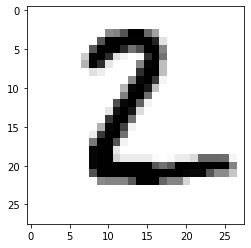

In [74]:
import matplotlib as plt
plt.imshow(X_test.reshape((-1, 28,28))[1],cmap='gray_r')
print(Y_test[1])
prediction = Mod.predict(X_test)
print('Predicted Value:',np.argmax(prediction[1]))
if(Y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

The prediction is done using the test images and the output is compared to the test labels.

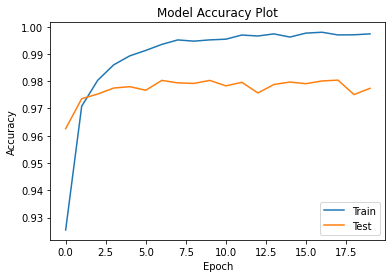

In [75]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy Plot')
plt.legend(loc='lower right')

# New Section

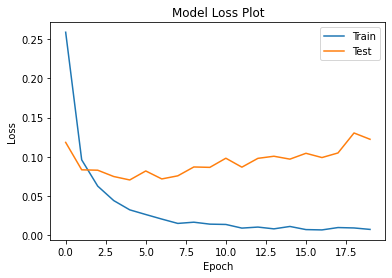

In [77]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss Plot')
plt.legend(loc='upper right')